In [33]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Activation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA

In [34]:
path = "F:\JupyterNotebook_Dir\REAM _Lab\EIA_RNN\Region_CAL.xlsx"
df = pd.read_excel(path)       #read data

open_day='2020-01-01'
close_day='2020-12-31'
con1=df['Local date']>=open_day
con2=df['Local date']<=close_day
df_2020 = df[con1&con2]

In [35]:
data_TI = df_2020["TI"].values;
data_COL = df_2020["NG: COL"].values      #access columns
data_NG = df_2020["NG: NG"].values;
data_NUC = df_2020["NG: NUC"].values;
data_OIL = df_2020["NG: OIL"].values
data_WAT = df_2020["NG: WAT"].values
data_SUN = df_2020["NG: SUN"].values;
data_WND = df_2020["NG: WND"].values;
data_OTH = df_2020["NG: OTH"].values
data_Trade = df_2020["Sum (Trade)"].values


data_D = df_2020["D"].values

data=np.vstack((data_TI,data_COL,data_NG,data_NUC,data_OIL,data_WAT,data_SUN,data_WND,data_OTH,data_Trade)).T

In [36]:
def rnn_model(seq_length, input_dim):
    model = Sequential()
#     model.add(tf.keras.layers.LSTM(128, input_shape= (seq_length, input_dim), return_sequences=False))
    model.add((SimpleRNN(128, input_shape=(seq_length, input_dim))))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
    model.add(Dropout(0.2))
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(1))
    return model

In [37]:
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

datas_scaled = scaler_input.fit_transform(data)
features = datas_scaled

target = data_D
target = target.reshape(-1,1)
target = scaler_output.fit_transform(target)



x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)
x_train.shape
win_length = 10
batch_size = 2000
num_features = 10
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [38]:
model = rnn_model(seq_length = win_length, input_dim = num_features)
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)

Epoch 1/100
4/4 [==============================] - 1s 234ms/step - loss: 0.1385 - mean_absolute_error: 0.2986 - val_loss: 0.0065 - val_mean_absolute_error: 0.0633
Epoch 2/100
4/4 [==============================] - 0s 62ms/step - loss: 0.0435 - mean_absolute_error: 0.1604 - val_loss: 0.0154 - val_mean_absolute_error: 0.1090
Epoch 3/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0374 - mean_absolute_error: 0.1581 - val_loss: 0.0110 - val_mean_absolute_error: 0.0894
Epoch 4/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0293 - mean_absolute_error: 0.1359 - val_loss: 0.0055 - val_mean_absolute_error: 0.0598
Epoch 5/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0172 - mean_absolute_error: 0.1028 - val_loss: 0.0233 - val_mean_absolute_error: 0.1381
Epoch 6/100
4/4 [==============================] - 0s 60ms/step - loss: 0.0197 - mean_absolute_error: 0.1119 - val_loss: 0.0102 - val_mean_absolute_error: 0.0839
Epoch 7/100
4/4 [==========

Epoch 51/100
4/4 [==============================] - 0s 58ms/step - loss: 0.0029 - mean_absolute_error: 0.0413 - val_loss: 0.0018 - val_mean_absolute_error: 0.0339
Epoch 52/100
4/4 [==============================] - 0s 62ms/step - loss: 0.0031 - mean_absolute_error: 0.0432 - val_loss: 0.0028 - val_mean_absolute_error: 0.0427
Epoch 53/100
4/4 [==============================] - 0s 63ms/step - loss: 0.0031 - mean_absolute_error: 0.0443 - val_loss: 0.0015 - val_mean_absolute_error: 0.0309
Epoch 54/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0028 - mean_absolute_error: 0.0411 - val_loss: 0.0015 - val_mean_absolute_error: 0.0305
Epoch 55/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0029 - mean_absolute_error: 0.0424 - val_loss: 0.0031 - val_mean_absolute_error: 0.0458
Epoch 56/100
4/4 [==============================] - 0s 62ms/step - loss: 0.0033 - mean_absolute_error: 0.0455 - val_loss: 0.0018 - val_mean_absolute_error: 0.0334
Epoch 57/100
4/4 [====

In [39]:
# model.evaluate_generator(test_generator, verbose=0)
predictions = model.predict_generator(test_generator)
predictions.shape[0]
# rev_trans = scaler_input.inverse_transform(datas_pred)
rev_trans = scaler_output.inverse_transform(predictions)

In [40]:
print(rev_trans.shape)
print(rev_trans[:,-1])

(1747, 1)
[27549.145 28644.01  29906.162 ... 30422.826 28879.525 27929.936]


<ipython-input-41-6d0af38a9cd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand'] = rev_trans[:,-1]


<AxesSubplot:>

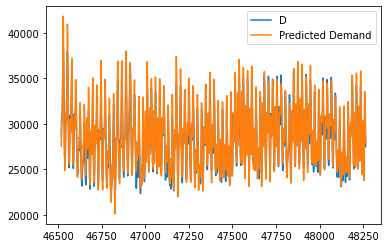

In [41]:
datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand'] = rev_trans[:,-1]
datas_final[['D','Predicted Demand']].plot()

Text(0.5, 1.0, 'Loss')

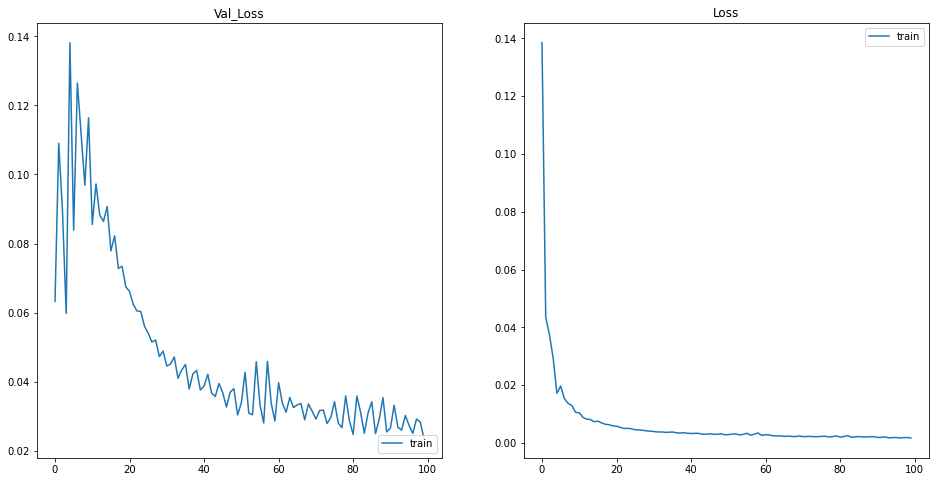

In [42]:
epoch = len(history.history['val_mean_absolute_error'])
epoch = np.arange(epoch)

plt.figure(figsize=(16,8))
#Plot accuracy vs epoch
plt.subplot(1,2,1)
# plt.plot(epoch,history.history['accuracy'])
plt.plot(epoch,history.history['val_mean_absolute_error'])
plt.title('Val_Loss')

plt.legend(labels=['train', 'val'],  loc='lower right')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(1,2,2)
plt.plot(epoch,history.history['loss'])
# plt.plot(epoch,history.history['val_loss'])
plt.legend(labels=['train', 'val'],  loc='upper right')
plt.title('Loss')
#### Fill in plot ####

# RFGSM attack (Random + FGSM)

In [43]:
data_test = test_generator[0][0]
data_test = tf.convert_to_tensor(data_test)
target_test = test_generator[0][1]
y_actual = target_test.reshape(-1,1)
y_actual = tf.convert_to_tensor(y_actual)



In [44]:
rand_pert =  tf.random.normal(data_test.shape, mean=0.0, stddev=1.0, dtype=tf.float64)
data_pert = data_test + rand_pert

with tf.GradientTape() as tape:
    data_pert = tf.cast(data_pert,dtype='float64')
    tape.watch(data_pert)
    yy = model(data_pert)
    
    yy = tf.cast(yy,dtype='float64')
    loss = tf.square(yy - y_actual)
#     loss = loss.astype('float32')
grad = tape.gradient(loss, data_pert)

sign_grad = tf.sign(grad)

In [45]:
sign_grad.shape

TensorShape([1747, 10, 10])

In [46]:
# levels = [0, 0.01,0.03,0.05,0.1]
levels = [0,0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21]

MAPE_RFGSM = []
r2Score_RFGSM = []
pert_level = []

for level in levels:
    x_adv = data_test + level*sign_grad
    y_adv = model(x_adv)
#     pert = mean_absolute_percentage_error(x_adv.reshape(-1,1),data_test.reshape(-1,1))
    pert = mean_absolute_percentage_error(tf.reshape(x_adv,(-1,1)),tf.reshape(data_test,(-1,1)))/10
    pert_level.append(pert*100)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    epsilon = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_RFGSM = r2_score(datas_final[['D']].values,y_adv)
    MAPE_RFGSM.append(epsilon*100)
    r2Score_RFGSM.append(score_RFGSM)
    
    


In [47]:
print(MAPE_RFGSM)
print(pert_level)

[3.2349752736626165, 7.226322728570944, 13.563563741920484, 20.222078789134688, 27.229815020727976, 34.39907985574757, 41.495839200608266, 48.33151928235685]
[0.0, 2.717641353607461, 6.739308770150354, 10.245541200563535, 15.251683780186948, 37.08036713581239, 27.363089924974922, 31.187161947924107]


# PCA defense against RFGSM attack

In [48]:
# generating PCA data
def generating_PCAdata(x,n):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    return x_pca


def reorganize(x,n):
    n0 =x.shape[0]
    n1 =x.shape[1]
    n2 =x.shape[2]
    
    x_re = np.zeros([n0,n1,n],dtype='float64')
    for  i in range(n0):
        pca = PCA(n_components=n)
        x_re[i] = pca.fit_transform(x[i])
    
    return x_re 

In [49]:
n_PCA = 8 #number of PCA features


datas_pca = generating_PCAdata(datas_scaled,n_PCA)
features_pca = datas_pca



x_train, x_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=123, shuffle=False)

win_length = 10
batch_size = 2000
# num_features = n_PCA
train_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7027, 8)
(7027, 1)
(1757, 8)
(1757, 1)


In [51]:
model_pca = rnn_model(seq_length = win_length, input_dim = n_PCA)
model_pca.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_pca = model_pca.fit_generator(train_generator_pca, epochs=100, validation_data=test_generator_pca, shuffle=False)

Epoch 1/100
4/4 [==============================] - 1s 214ms/step - loss: 0.0646 - mean_absolute_error: 0.1927 - val_loss: 0.0426 - val_mean_absolute_error: 0.1792
Epoch 2/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0514 - mean_absolute_error: 0.1805 - val_loss: 0.0214 - val_mean_absolute_error: 0.1175
Epoch 3/100
4/4 [==============================] - 0s 59ms/step - loss: 0.0199 - mean_absolute_error: 0.1116 - val_loss: 0.0254 - val_mean_absolute_error: 0.1343
Epoch 4/100
4/4 [==============================] - 0s 57ms/step - loss: 0.0180 - mean_absolute_error: 0.1059 - val_loss: 0.0161 - val_mean_absolute_error: 0.1057
Epoch 5/100
4/4 [==============================] - 0s 60ms/step - loss: 0.0146 - mean_absolute_error: 0.0954 - val_loss: 0.0095 - val_mean_absolute_error: 0.0788
Epoch 6/100
4/4 [==============================] - 0s 59ms/step - loss: 0.0113 - mean_absolute_error: 0.0841 - val_loss: 0.0081 - val_mean_absolute_error: 0.0721
Epoch 7/100
4/4 [==========

Epoch 51/100
4/4 [==============================] - 0s 59ms/step - loss: 0.0018 - mean_absolute_error: 0.0336 - val_loss: 0.0012 - val_mean_absolute_error: 0.0279
Epoch 52/100
4/4 [==============================] - 0s 59ms/step - loss: 0.0018 - mean_absolute_error: 0.0333 - val_loss: 0.0012 - val_mean_absolute_error: 0.0275
Epoch 53/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0018 - mean_absolute_error: 0.0330 - val_loss: 0.0012 - val_mean_absolute_error: 0.0273
Epoch 54/100
4/4 [==============================] - 0s 46ms/step - loss: 0.0018 - mean_absolute_error: 0.0330 - val_loss: 0.0012 - val_mean_absolute_error: 0.0274
Epoch 55/100
4/4 [==============================] - 0s 45ms/step - loss: 0.0019 - mean_absolute_error: 0.0338 - val_loss: 0.0013 - val_mean_absolute_error: 0.0281
Epoch 56/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0331 - val_loss: 0.0012 - val_mean_absolute_error: 0.0270
Epoch 57/100
4/4 [====

4/4 [==============================] - 0s 37ms/step - loss: 0.0012 - mean_absolute_error: 0.0268 - val_loss: 7.7508e-04 - val_mean_absolute_error: 0.0222


In [52]:

predictions_pca = model_pca.predict_generator(test_generator_pca)
predictions_pca.shape[0]
rev_trans_pca = scaler_output.inverse_transform(predictions_pca)

<ipython-input-53-107bfaac419e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]


<AxesSubplot:>

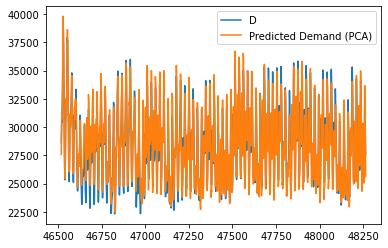

In [53]:
# datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]
datas_final[['D','Predicted Demand (PCA)']].plot()

In [54]:
MAPE_pca_RFGSM = []
r2Score_PCA = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_re = reorganize(x_adv,n_PCA)

    y_adv = model_pca(x_re)
    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_pca = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_PCA = r2_score(datas_final[['D']].values,y_adv)
    MAPE_pca_RFGSM.append(epsilon_pca*100)
    r2Score_PCA.append(score_PCA)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

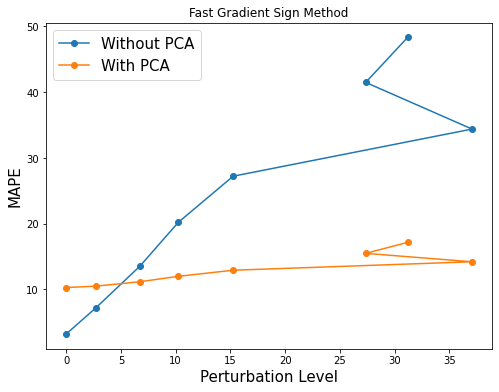

In [55]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_RFGSM, label="Without PCA",marker='o');
plt.plot(pert_level, MAPE_pca_RFGSM, label="With PCA",marker='o');

plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

# Autoencoder defense against RFGSM attack

In [56]:
class ae_model(keras.Model):
    
    def __init__(self):
        super(ae_model, self).__init__()  
        
        self.encoder = Sequential([
            Dense(16),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(64),
            Activation('relu'),
            Dense(8),
            Activation('relu'),

        ])

        # Decoders解码，网络
        self.decoder = Sequential([
            Dense(64),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(16),
            Activation('relu'),
            Dense(10),
            Activation('relu'),

        ])

    # 2. 前向传播的过程
    def call(self, inputs, training=None):
        h = self.encoder(inputs)
        x_hat = self.decoder(h)

        return x_hat


model_ae = ae_model()
model_ae.build(input_shape=(None, 10))     
model_ae.summary()


Model: "ae_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 8)                 3352      
_________________________________________________________________
sequential_7 (Sequential)    (None, 10)                3354      
Total params: 6,706
Trainable params: 6,706
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_ae.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_ae = model_ae.fit(datas_scaled, datas_scaled , epochs = 20)

Epoch 1/20
275/275 [==============================] - 0s 935us/step - loss: 0.0567 - mean_absolute_error: 0.1666
Epoch 2/20
275/275 [==============================] - 0s 822us/step - loss: 0.0229 - mean_absolute_error: 0.0823
Epoch 3/20
275/275 [==============================] - 0s 760us/step - loss: 0.0210 - mean_absolute_error: 0.0694
Epoch 4/20
275/275 [==============================] - 0s 775us/step - loss: 0.0205 - mean_absolute_error: 0.0647
Epoch 5/20
275/275 [==============================] - 0s 720us/step - loss: 0.0201 - mean_absolute_error: 0.0607
Epoch 6/20
275/275 [==============================] - 0s 830us/step - loss: 0.0200 - mean_absolute_error: 0.0591
Epoch 7/20
275/275 [==============================] - 0s 715us/step - loss: 0.0199 - mean_absolute_error: 0.0585
Epoch 8/20
275/275 [==============================] - 0s 709us/step - loss: 0.0199 - mean_absolute_error: 0.0577
Epoch 9/20
275/275 [==============================] - 0s 716us/step - loss: 0.0199 - mean_absolu

In [58]:
MAPE_ae_RFGSM = []
r2Score_ae = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_reshape = tf.reshape(x_adv,[x_adv.shape[0]*x_adv.shape[1],x_adv.shape[2]])
    x_adv = model_ae.predict(x_adv_reshape)
    x_adv = tf.reshape(x_adv,[int(x_adv.shape[0]/win_length),win_length,x_adv.shape[1]])
    y_adv = model(x_adv)

    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_ae = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_ae= r2_score(datas_final[['D']].values,y_adv)
    MAPE_ae_RFGSM.append(epsilon_ae*100)
    r2Score_ae.append(score_ae)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [59]:
y_adv.shape

(1747, 1)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

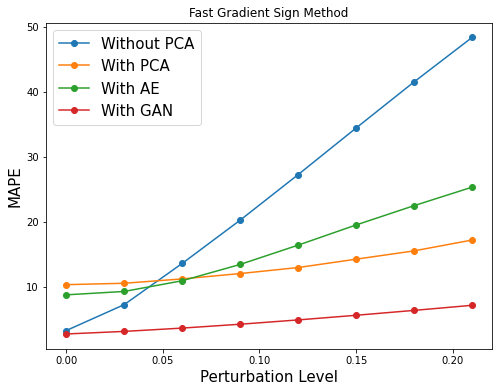

In [66]:
plt.figure(figsize=(8,6))
plt.plot(levels, MAPE_RFGSM, label="Without PCA",marker='o');
plt.plot(levels, MAPE_pca_RFGSM, label="With PCA",marker='o');
plt.plot(levels, MAPE_ae_RFGSM, label="With AE",marker='o');
plt.plot(levels, MAPE_GAN_RFGSM, label="With GAN",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

#  GAN defense

In [61]:
G = tf.keras.models.load_model('Generator_EIA')
G.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 10)                630       
Total params: 630
Trainable params: 630
Non-trainable params: 0
_________________________________________________________________


plt.plot(range(EPOCHS),list_genLoss,label = 'd_loss')
plt.plot(range(EPOCHS),list_disLoss,label = 'g_loss')
plt.legend()

In [62]:
####### GAN-based denosing######
MAPE_GAN_RFGSM = []
r2Score_GAN = []
num_iter = 500
lr_z = 1e-2

dim_noise = 8

for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_re = tf.reshape(x_adv , [x_adv.shape[0]*x_adv.shape[1], x_adv.shape[2]])
    z = tf.random.normal([x_adv.shape[0]*x_adv.shape[1], dim_noise])
    for i in range(num_iter):
        with tf.GradientTape() as g:
            g.watch(z)
            x_gen = G(z)

            x_gen = tf.cast(x_gen,dtype=tf.float64)
            loss = tf.square(x_adv_re - x_gen)
            gradient_adv = g.gradient(loss, z)
            z = z - lr_z*gradient_adv
#             print(gradient_adv.shape)
    x_gen = G(z)
   
    x_gen = tf.reshape(x_gen,[int(x_gen.shape[0]/win_length),win_length,x_gen.shape[1]])
    y_adv = model(x_gen)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    
    epsilon_GAN = mean_absolute_percentage_error(datas_final[['D']].values,y_adv*(1+level))
    score_GAN= r2_score(datas_final[['D']].values,y_adv)
    MAPE_GAN_RFGSM.append(epsilon_GAN*100/4)
    r2Score_GAN.append(score_GAN)
    
    
    

print(MAPE_GAN_RFGSM)

[2.708278201684445, 3.1039744482467553, 3.6128638989941613, 4.2092655115002975, 4.870948972572986, 5.584972528801952, 6.3371361168722276, 7.120260661272894]


Text(0.5, 1.0, 'Random Fast Gradient Sign Method')

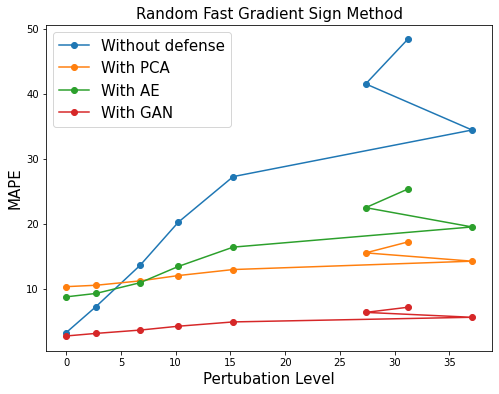

In [63]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_RFGSM, label="Without defense",marker='o');
plt.plot(pert_level, MAPE_pca_RFGSM, label="With PCA",marker='o');
plt.plot(pert_level, MAPE_ae_RFGSM, label="With AE",marker='o');
plt.plot(pert_level, MAPE_GAN_RFGSM, label="With GAN",marker='o');
plt.xlabel("Pertubation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Random Fast Gradient Sign Method",fontsize=15)

In [64]:
print(pert_level)
print(MAPE_RFGSM)
print(MAPE_pca_RFGSM)
print(MAPE_ae_RFGSM)
print(MAPE_GAN_RFGSM)

[0.0, 2.717641353607461, 6.739308770150354, 10.245541200563535, 15.251683780186948, 37.08036713581239, 27.363089924974922, 31.187161947924107]
[3.2349752736626165, 7.226322728570944, 13.563563741920484, 20.222078789134688, 27.229815020727976, 34.39907985574757, 41.495839200608266, 48.33151928235685]
[10.297258034971525, 10.51092617920102, 11.18062606689722, 12.005123228302793, 12.930215062310394, 14.216544400503572, 15.495754535950933, 17.163073931113864]
[8.728937513006423, 9.252477946952501, 10.89803072563194, 13.40899739611239, 16.37893571633309, 19.483564007586025, 22.45410811212551, 25.296408004588677]
[2.708278201684445, 3.1039744482467553, 3.6128638989941613, 4.2092655115002975, 4.870948972572986, 5.584972528801952, 6.3371361168722276, 7.120260661272894]
